In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [15]:
x = [0, 1, 2]
test = [1, 2, 3, 4, 5]
test2 = [5, 3, 2, 1, -2]

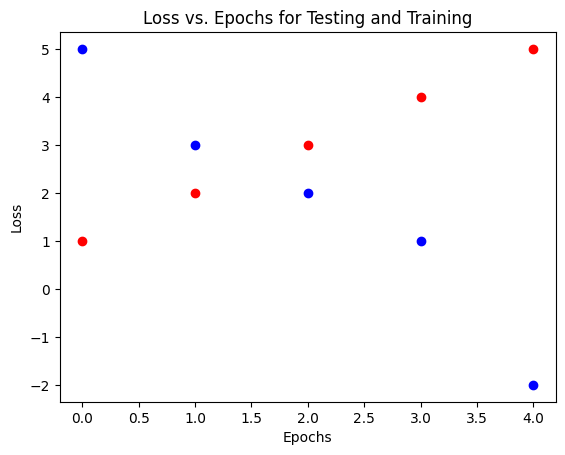

In [16]:
import matplotlib.pyplot as plt
import numpy as np
epochs = 5
train_loss_arr = test
test_loss_arr = test2

xdata = np.arange(0, epochs, 1)
train_data = np.array(train_loss_arr)
test_data = np.array(test_loss_arr)
fig, ax = plt.subplots()
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs. Epochs for Testing and Training")
ax.scatter(xdata, train_data, color="r")
ax.scatter(xdata, test_data, color="b")
plt.show()

In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
import AudioFileDataset as afd
import NeuralNetwork as mlp
import matplotlib.pyplot as plt
import numpy as np
from functools import partial
from torchaudio import transforms as T
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler

In [4]:
def load_data(data_dir):
    # define MFCC transformation
    n_fft = 2048
    # win_length = None
    hop_length = 256
    n_mels = 128
    n_mfcc = 128
    sample_rate = 6000
    # current_array=np.zeros(10)

    mfcc_transform = T.MFCC(
        sample_rate=sample_rate,
        n_mfcc=n_mfcc,
        melkwargs={
            "n_fft": n_fft,
            "n_mels": n_mels,
            "hop_length": hop_length,
            "mel_scale": "htk",
        },
    )

    train_data = afd.AudioFileDataset(data_dir, "/train_files.csv", "wav_training_data", mfcc_transform)
    test_data = afd.AudioFileDataset(data_dir, "/test_files.csv", "wav_training_data", mfcc_transform)

    return train_data, test_data
path = os.path.abspath("./")
train_data = load_data(path)
train_loader = DataLoader(
        train_data, 
        batch_size=5,
        shuffle=True,
        num_workers=8
)

for batch, data in enumerate(train_loader):
    print(type(data))

/home/winnie/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


UnboundLocalError: Caught UnboundLocalError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/winnie/.local/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/winnie/.local/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 58, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/winnie/.local/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 58, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/winnie/CodingProjects/Python/BME 450/BME450 Project/BME450-project-repo/AudioFileDataset.py", line 35, in __getitem__
    return mfcc[:,:,:128], label                # mfcc has shape [1, n_mfcc, time]
UnboundLocalError: local variable 'mfcc' referenced before assignment
